# Action2_Mobile_recommendation_system_for_visual_data_exploration

In [147]:
%%time
# 数据加载
import pandas as pd

data = pd.read_csv('./fresh_comp_offline/tianchi_fresh_comp_train_user.csv')
data

Wall time: 11.8 s


,user_id,item_id,behavior_type,user_geohash,item_category,time
0,10001082,285259775,1,97lk14c,4076,2014-12-08 18
1,10001082,4368907,1,NaN,5503,2014-12-12 12
2,10001082,4368907,1,NaN,5503,2014-12-12 12
3,10001082,53616768,1,NaN,9762,2014-12-02 15
4,10001082,151466952,1,NaN,5232,2014-12-12 11
...,...,...,...,...,...,...
23291022,65341491,259008790,1,NaN,13164,2014-12-03 12
23291023,65341491,336404938,1,NaN,13164,2014-12-03 12
23291024,65341491,52142024,1,95qhbsu,5201,2014-12-10 22
23291025,65341491,250557965,1,NaN,13164,2014-12-03 12


In [4]:
# 计算CVR
count_all , count_4 = 0 , 0
count_user = data['behavior_type'].value_counts()
count_all = count_user[1] + count_user[2] + count_user[3] + count_user[4]
count_4 = count_user[4]

cvr = count_4 / count_all
print('cvr={}%'.format(cvr * 100))

cvr=0.9985776926023916%


In [5]:
count_all

23291027

In [6]:
# 将time字段设置为pandas中的datatimes
data['time'] = pd.to_datetime(data['time'])
data.index = data['time']
data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
time,,,,,,
2014-12-08 18:00:00,10001082,285259775,1,97lk14c,4076,2014-12-08 18:00:00
2014-12-12 12:00:00,10001082,4368907,1,NaN,5503,2014-12-12 12:00:00
2014-12-12 12:00:00,10001082,4368907,1,NaN,5503,2014-12-12 12:00:00
2014-12-02 15:00:00,10001082,53616768,1,NaN,9762,2014-12-02 15:00:00
2014-12-12 11:00:00,10001082,151466952,1,NaN,5232,2014-12-12 11:00:00


In [92]:
from collections import defaultdict
from datetime import datetime,timedelta

count_day = defaultdict(int)
# 从2014-11-18遍历到2014-12-18
str1 = '2014-11-17'
temp_date = datetime.strptime(str1,'%Y-%m-%d') # 从字符串中解析出新的日期时间
delta = timedelta(days=1)
for i in range(31):
    temp_date = temp_date + delta
    # 将时间转换成字符串类型
    temp_str = temp_date.strftime('%Y-%m-%d')
    # data的index为时间
    count_day[temp_str] += data[temp_str].shape[0]
print(count_day)

In [34]:
data['2014-12-12']

,user_id,item_id,behavior_type,user_geohash,item_category,time
time,,,,,,
2014-12-12 12:00:00,10001082,4368907,1,NaN,5503,2014-12-12 12:00:00
2014-12-12 12:00:00,10001082,4368907,1,NaN,5503,2014-12-12 12:00:00
2014-12-12 11:00:00,10001082,151466952,1,NaN,5232,2014-12-12 11:00:00
2014-12-12 12:00:00,10001082,290088061,1,NaN,5503,2014-12-12 12:00:00
2014-12-12 12:00:00,10001082,298397524,1,NaN,10894,2014-12-12 12:00:00
...,...,...,...,...,...,...
2014-12-12 11:00:00,65341491,363795036,1,NaN,4721,2014-12-12 11:00:00
2014-12-12 06:00:00,65341491,322495684,1,NaN,5522,2014-12-12 06:00:00
2014-12-12 06:00:00,65341491,231236283,1,NaN,10961,2014-12-12 06:00:00


## 时间规律统计，11月18日-12月18日 每天操作次数（双12左右猛涨）

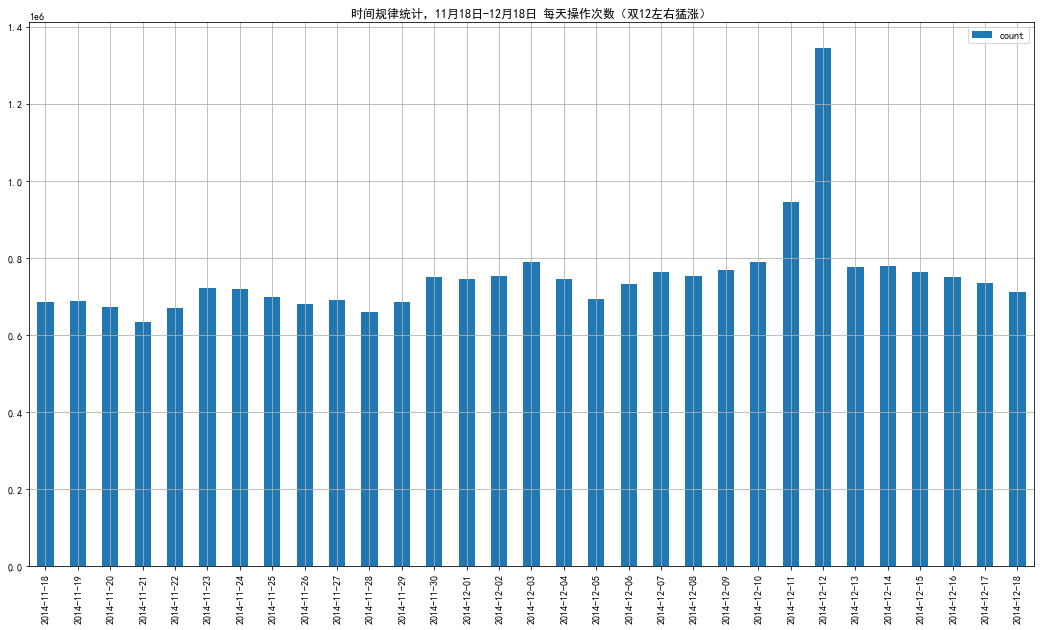

In [90]:
import matplotlib.pyplot as plt
# # Matplotlib图中文显示问题
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(18,10))
df_count_day = pd.DataFrame.from_dict(count_day,orient='index',columns=['count'])
df_count_day['count'].plot(kind='bar')
plt.legend(loc='best')
plt.grid(True)
plt.title('时间规律统计，11月18日-12月18日 每天操作次数（双12左右猛涨）')
# plt.xlim([0,30])
# plt.ylim([0,max(df_count_day['count'])])
plt.show()

In [57]:
df_count_day.loc['2014-12-12']

count    1344980
Name: 2014-12-12, dtype: int64

## 时间规律统计，11月18日-12月18日 属于商品子集P的操作次数（双12左右猛涨）

In [63]:
# 属于商品子集P的操作次数
df_p = pd.read_csv('./fresh_comp_offline/tianchi_fresh_comp_train_item.csv')
# 使用reset_index将原data的index还原
df = pd.merge(data,df_p,on=['item_id']).set_index('time')

In [64]:
df.shape

(4279962, 7)

In [67]:
data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
time,,,,,,
2014-12-08 18:00:00,10001082,285259775,1,97lk14c,4076,2014-12-08 18:00:00
2014-12-12 12:00:00,10001082,4368907,1,NaN,5503,2014-12-12 12:00:00
2014-12-12 12:00:00,10001082,4368907,1,NaN,5503,2014-12-12 12:00:00
2014-12-02 15:00:00,10001082,53616768,1,NaN,9762,2014-12-02 15:00:00
2014-12-12 11:00:00,10001082,151466952,1,NaN,5232,2014-12-12 11:00:00


In [93]:
def count_day_show(df,title=''):
    count_day = defaultdict(int)
# 从2014-11-18遍历到2014-12-18
    str1 = '2014-11-17'
    temp_date = datetime.strptime(str1,'%Y-%m-%d') # 从字符串中解析出新的日期时间
    delta = timedelta(days=1)
    for i in range(31):
        temp_date = temp_date + delta
        # 将时间转换成字符串类型
        temp_str = temp_date.strftime('%Y-%m-%d')
        # data的index为时间
        count_day[temp_str] += df[temp_str].shape[0]
    
    plt.figure(figsize=(18,10))
    df_count_day = pd.DataFrame.from_dict(count_day,orient='index',columns=['count'])
    df_count_day['count'].plot(kind='bar')
    plt.legend(loc='best')
    plt.grid(True)
    plt.title(title)
    # plt.xlim([0,30])
    # plt.ylim([0,max(df_count_day['count'])])
    plt.show()

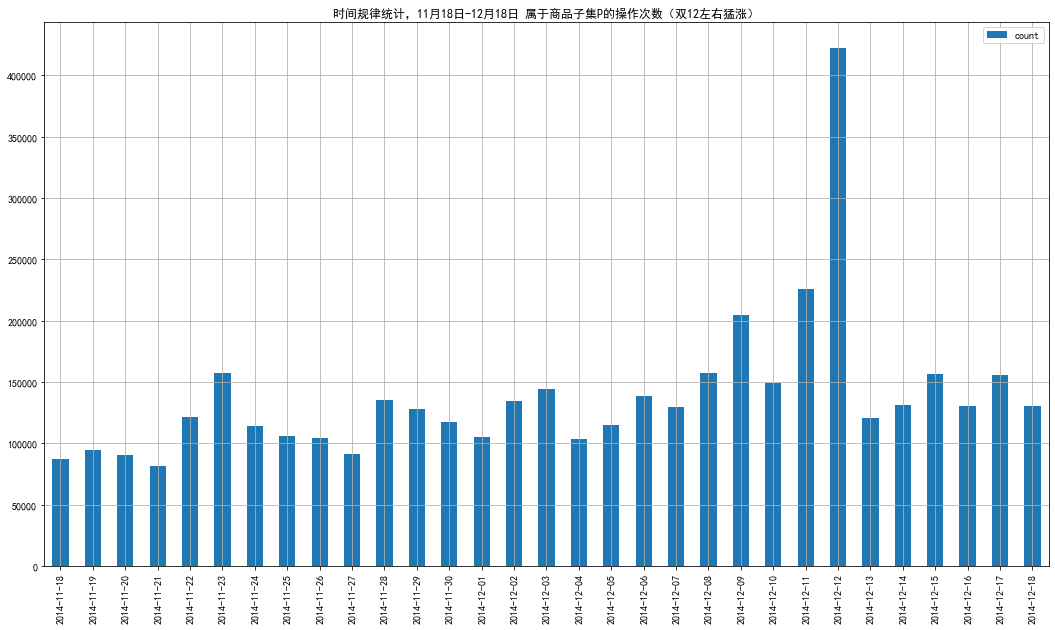

In [94]:
count_day_show(df,'时间规律统计，11月18日-12月18日 属于商品子集P的操作次数（双12左右猛涨）')

In [89]:
df.loc['2014-12-12']

,user_id,item_id,behavior_type,user_geohash,item_category_x,item_geohash,item_category_y
time,,,,,,,
2014-12-12 20:00:00,126536001,275221686,1,NaN,10576,NaN,10576
2014-12-12 21:00:00,55469846,326973863,3,NaN,10576,NaN,10576
2014-12-12 21:00:00,55469846,326973863,1,NaN,10576,NaN,10576
2014-12-12 21:00:00,55469846,326973863,1,NaN,10576,NaN,10576
2014-12-12 21:00:00,55469846,326973863,1,NaN,10576,NaN,10576
...,...,...,...,...,...,...,...
2014-12-12 00:00:00,65113833,287179638,1,NaN,11376,NaN,11376
2014-12-12 00:00:00,65113833,287179638,1,NaN,11376,NaN,11376
2014-12-12 00:00:00,65113833,370638941,1,NaN,12553,NaN,12553


## 时间规律统计，通过某一天的24小时的4个类别的操作情况（比如2014-12-12）

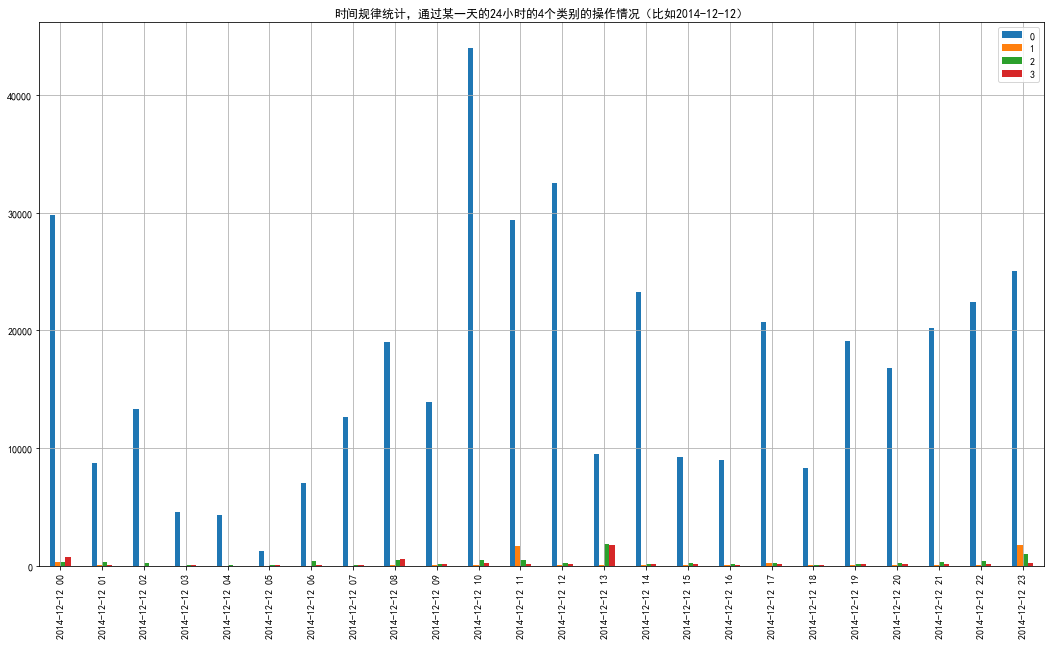

In [133]:
def count_hour_show(date1):
    count_hour = {}
    # 设置初始值
    for i in range(24):
        time_str = date1 + ' %02.d' % i
#         print(time_str)
        count_hour[time_str] = [0,0,0,0]
        temp = df[time_str]['behavior_type'].value_counts()
#         print(temp)
        for j in range(len(temp)):
            count_hour[time_str][temp.index[j]-1] += temp[temp.index[j]]
#     print(count_hour)
    
    # 字典类型生成DataFrame
    global df_count_hour
    df_count_hour = pd.DataFrame.from_dict(count_hour,orient='index')
    df_count_hour.plot(kind='bar',figsize=(18,10))
    plt.legend(loc = 'best')
    plt.title('时间规律统计，通过某一天的24小时的4个类别的操作情况（比如2014-12-12）')
    plt.grid(True)
    plt.show()
count_hour_show('2014-12-12')

In [120]:
df_count_hour.head()

,0,1,2,3
2014-12-12 00,29817,336,285,758
2014-12-12 01,8736,101,288,75
2014-12-12 02,13356,24,196,22
2014-12-12 03,4530,14,42,27
2014-12-12 04,4280,11,42,10


## 大数据读取练习

In [145]:
# chunksize和gc练习
import gc
def get_df(file_path):
    mylist = []
    for chunk in pd.read_csv(file_path,chunksize=2000000):
        mylist.append(chunk)
    temp_df = pd.concat(mylist,axis=0)
    del mylist
    gc.collect()
    return temp_df
#     return mylist

In [146]:
%%time
file_path = './fresh_comp_offline/tianchi_fresh_comp_train_user.csv'
df = get_df(file_path)
df

Wall time: 13.9 s


,user_id,item_id,behavior_type,user_geohash,item_category,time
0,10001082,285259775,1,97lk14c,4076,2014-12-08 18
1,10001082,4368907,1,NaN,5503,2014-12-12 12
2,10001082,4368907,1,NaN,5503,2014-12-12 12
3,10001082,53616768,1,NaN,9762,2014-12-02 15
4,10001082,151466952,1,NaN,5232,2014-12-12 11
...,...,...,...,...,...,...
23291022,65341491,259008790,1,NaN,13164,2014-12-03 12
23291023,65341491,336404938,1,NaN,13164,2014-12-03 12
23291024,65341491,52142024,1,95qhbsu,5201,2014-12-10 22
23291025,65341491,250557965,1,NaN,13164,2014-12-03 12
